# Advanced Machine Learning Semester Exam 

<p>Section A</p>
<p>NAML84112: ADVANCED MACHINE LEARNING</p>
<p>Sol Plaatje University</p>
<p>BSc. Hons. in Data Science</p>
<p>Kyle Groenewald</p>
<p>Student no.: 201710099</p>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Question 3

In [2]:
size = 10
x = np.linspace(-5, 5, size)

In [ ]:
# kernels

In [3]:
kernel_1 = lambda x_m, x_n: [np.exp((-abs(x_m-n)**2)/2) for n in x_n]

In [4]:
kernel_2 = lambda x_m, x_n: [(10+np.dot(x_n.T, m))**2 for m in x_m]

In [5]:
kernel_3 = lambda x_m, x_n: [np.exp(-abs(x_m-n)) for n in x_n]

In [6]:
covariance_1 = kernel_1(x,x)
covariance_2 = kernel_2(x,x)
covariance_3 = kernel_3(x,x)

<AxesSubplot:>

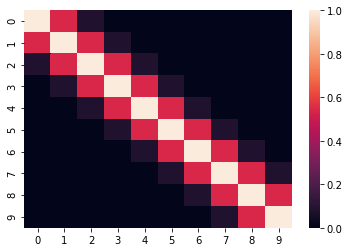

In [7]:
sns.heatmap(covariance_1)

<AxesSubplot:>

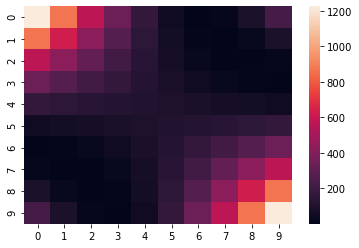

In [8]:
sns.heatmap(covariance_2)

<AxesSubplot:>

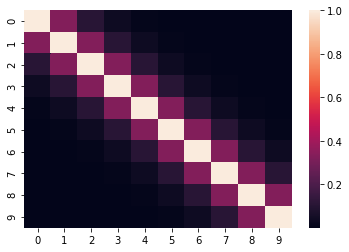

In [9]:
sns.heatmap(covariance_3)

Kernel 1 and 3 both calculate the distance differences between points but in different ways. The 1st kernel gets the exponentiated squared distance between points, similar to the Gaussian distribution, and the 3rd kernel gets the exponentiated absolute distance. Their covariance matrix correlations are similar in shape, symmetric over the values (since there are 10 values), but the 1st kernel has stronger correlations for points that are closer (~ = 0.6) than that of kernel 3 (~= 0.3). Kernel 2's covariance is symmetric about opposite points, with high correlations at the extremities. This kernel assumes that the first and last points are significant.

### Question 3.3

In [10]:
kernel = lambda x_m, x_n: [np.exp((-abs(x_m-n)**2)/2) for n in x_n] #kernel definition

In [23]:
size_ = 100
x = np.linspace(-5, 5, size_)
xl = np.array([-4,-2,4]) #initializing

In [61]:
y = np.random.normal(0, 1, size_)

In [43]:
x_joint = np.r_[x, xl] #creating the joint distribution

In [90]:
K = kernel(x, x) # kernel calculations

In [91]:
K = np.array(K)
K.shape

In [92]:
Kx = kernel(x_joint, x)

In [101]:
Kx = np.array(Kx)
Kx.shape

(100, 103)

In [94]:
Kxx = kernel(x_joint, x_joint)

In [95]:
Kxx = np.array(Kxx)
Kxx.shape

In [102]:
mu_posterior = Kx.T@np.linalg.inv(K)@y # mean_post (because of indexing choices, transposes are inverted i.e a.T = a, b = b.T)

In [103]:
K_posterior = Kxx - Kx.T@np.linalg.inv(K)@Kx # K_post

In [ ]:
# plotting

In [104]:
y1 = np.array([-0.5, 0.5, 0.0])

In [108]:
x_prior = np.linspace(-4, 4, 103)

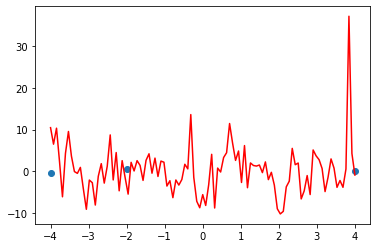

In [118]:
plt.scatter(x1,y1)

plt.plot(x_prior, mu_posterior, label = 'Mean', color = 'red')
plt.show()

In [112]:
std_dev = np.sqrt(np.diag(K_posterior))

<ipython-input-112-52d60b5da8e6>:1: RuntimeWarning: invalid value encountered in sqrt
  std_dev = np.sqrt(np.diag(K_posterior))


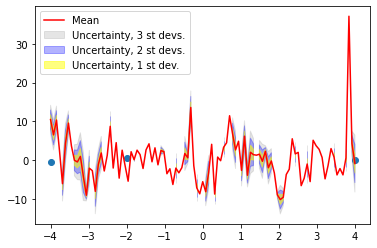

In [117]:
# plotting uncertainty
plt.scatter(x1,y1)
plt.plot(x_prior, mu_posterior, label = 'Mean', color = 'red')
plt.fill_between(x_prior, mu_posterior+3*std_dev,
         mu_posterior-3*std_dev, alpha = 0.2, color = 'grey', label = 'Uncertainty, 3 st devs.')
plt.fill_between(x_prior, mu_posterior+2*std_dev,
         mu_posterior-2*std_dev, alpha = 0.3, color = 'blue', label = 'Uncertainty, 2 st devs.')
plt.fill_between(x_prior, mu_posterior+1*std_dev,
         mu_posterior-1*std_dev, alpha = 0.5, color = 'yellow', label = 'Uncertainty, 1 st dev.')
plt.legend()
plt.show()

### Question 1

1.1 The relationship between x and y for a probabilistic linear regression model can be defined as follows. mu = a + βx, where a and β are parameter vectors used to determine mu. Both a and β are stochastic variables used to determine mu, and y is a function of mu and e, where e is the error term, which is also stochastic.

1.2 y ~ N(mu, e) or a Normal distribution

### Question 2

A square root function seems to fit the plot. The values for y is not lower than 0. The shape is similar to a root function,
with a curve shape nearly identical to one.

f(x)= a√b(x−h) + k where a is not 0 and b > 0

For a neural network, with weights w, the function is:

y = w1 √w2(x−w3) + w4 where w1 is not 0 and w2 > 0

### Question 4

4.1 The weaknesses of using k-means is that the user has to specify k (the number of clusters) in the beginning and that
k-means assumes that we deal with spherical clusters and that each cluster has roughly equal numbers of observations. 
This is not necessarily true, as shown in the figure.

4.2 It is a probabilistic method for obtaining a fuzzy classification of the observations. The probability of belonging to each cluster is calculated and a classification is usually achieved by assigning each observation to the most likely cluster. 
These probabilities can also be used to interpret suspected classifications. Gaussian Mixture Models can discover complex patterns and group them into cohesive, homogeneous components that are close representatives of real patterns within the data set and aren't bound to clusters.